In [30]:
#Import The green Cab Data
import pandas as pd
import sodapy
from sodapy import Socrata
from timeit import default_timer


# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
#client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofnewyork.us",
                  "mInZoLergBidZkJY82xc7FYke")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
start = default_timer()

# do stuff
#16385532
resultsGreen = client.get("pqfs-mqru",limit=40000)
# Convert to pandas DataFrame
results_dfGreen = pd.DataFrame.from_records(resultsGreen)
duration = default_timer() - start
print(duration/60)

0.060279160698189574


In [31]:
#Import The Yellow Cab Data
import pandas as pd
import sodapy
from sodapy import Socrata
from timeit import default_timer

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
#client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofnewyork.us",
                  "mInZoLergBidZkJY82xc7FYke")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
start = default_timer()

# do stuff
#16385532
resultsYellow = client.get("uacg-pexx",limit=40000)
# Convert to pandas DataFrame
results_dfYellow = pd.DataFrame.from_records(resultsYellow)
duration = default_timer() - start
print(duration/60)

0.04068723445740072


In [32]:
#print(results_dfYellow)

In [33]:
#show the average trip amount

tip_amountGreen = 0
tip_amountYellow = 0
for x in results_dfGreen.tip_amount:
    tip_amountGreen = (tip_amountGreen + float(x))
for x in results_dfYellow.tip_amount:
    tip_amountYellow = (tip_amountYellow + float(x))
print('Aerage tip amount Green: ' +str(tip_amountGreen/len(results_dfGreen.tip_amount)))
print('Aerage tip amount Yellow: ' + str(tip_amountYellow/len(results_dfYellow.tip_amount)))



Aerage tip amount Green: 1.1980115000000113
Aerage tip amount Yellow: 1.7913762500000059


In [34]:
#show the averga price per KM Tip amount included
distanceKM = []
TotalAmount = []
Amount = []
Total = 0
for x in results_dfGreen.trip_distance:
    distanceKM.append(float(x)/float("0.62137"))
for x in results_dfGreen.total_amount:
    TotalAmount.append(float(x))
for x in range(0,len(TotalAmount)):
    if(distanceKM[x] > 0 and TotalAmount[x] > 0):
        Amount.append(TotalAmount[x]/distanceKM[x])
for x in Amount:
    Total += x
print("Average price per KM Green: " + str(Total/len(Amount)))   
    
for x in results_dfYellow.trip_distance:
    distanceKM.append(float(x)/float("0.62137"))
for x in results_dfYellow.total_amount:
    TotalAmount.append(float(x))
for x in range(0,len(TotalAmount)):
    if(distanceKM[x] > 0 and TotalAmount[x] > 0):
        Amount.append(TotalAmount[x]/distanceKM[x])
for x in Amount:
    Total += x
print("Average price per KM Yellow: " + str(Total/len(Amount)))

Average price per KM Green: 5.7883236396506055
Average price per KM Yellow: 7.611067653559512


In [35]:
#show the averga price per KM without the Tip amount
distanceKM = []
TotalAmount = []
Amount = []
Tip_Amount = []
Total = 0
for x in results_dfGreen.trip_distance:
    distanceKM.append(float(x)/float("0.62137"))
for x in results_dfGreen.total_amount:
    TotalAmount.append(float(x))
for x in results_dfGreen.tip_amount:
    Tip_Amount.append(float(x))
for x in range(0,len(TotalAmount)):
    if(distanceKM[x] > 0 and TotalAmount[x] > 0):
        Amount.append((TotalAmount[x] - Tip_Amount[x])/distanceKM[x])
for x in Amount:
    Total += x

print("Average price per KM(Green) without Tips: " + str(Total/len(Amount)))   
    
for x in results_dfYellow.trip_distance:
    distanceKM.append(float(x)/float("0.62137"))
for x in results_dfYellow.total_amount:
    TotalAmount.append(float(x))
for x in results_dfYellow.tip_amount:
    Tip_Amount.append(float(x))
for x in range(0,len(TotalAmount)):
    if(distanceKM[x] > 0 and TotalAmount[x] > 0):
        Amount.append((TotalAmount[x] - Tip_Amount[x])/distanceKM[x])
for x in Amount:
    Total += x
print("Average price per KM(Yellow) without Tips: " + str(Total/len(Amount)))

Average price per KM(Green) without Tips: 5.41358431880782
Average price per KM(Yellow) without Tips: 7.060009525892464


In [36]:
#creates arrays of Tip Amounts for Graph
payments=results_dfGreen.tip_amount
paymentsDetailGreen=[]
zero=[]
zeroAndHalf=[]
One=[]
OneAndAHalf=[]
Two=[]
TwoAndAHalf=[]
Three=[]
ThreeAndAHalf=[]
Four=[]
FourAndAHalf=[]
Five=[]
FiveAndAHalf=[]
Six=[]
SixAndAHalf=[]
Seven=[]
SevenAndAHalf=[]
Eigt=[]
EigtAndAHalf=[]
more=[]
for x in payments:
    
    if x=='0':
        zero.append(x) 
    elif x<='0.5':
        zeroAndHalf.append(x)
    elif x<='1':
        One.append(x)
    elif x<='1.5':
        OneAndAHalf.append(x)
    elif x<='2':
        Two.append(x)     
    elif x<='2.5':
        TwoAndAHalf.append(x) 
    elif x<='3':
        Three.append(x) 
    elif x<='3.5':
        ThreeAndAHalf.append(x) 
    elif x<='4':
        Four.append(x) 
    elif x<='4.5':
        FourAndAHalf.append(x) 
    elif x<='5':
        Five.append(x) 
    elif x<='5.5':
        FiveAndAHalf.append(x) 
    elif x<='6':
        Six.append(x) 
    elif x<='6.5':
        SixAndAHalf.append(x) 
    elif x<='7':
        Seven.append(x)
    elif x<='7.5':
        SevenAndAHalf.append(x)
    elif x<='8':
        Eigt.append(x) 
    elif x<='8.5':
        EigtAndAHalf.append(x)
    else:
        more.append(x)
paymentsDetailGreen.extend((len(zero),len(zeroAndHalf),len(One),len(OneAndAHalf),len(Two),len(TwoAndAHalf),len(Three),len(ThreeAndAHalf)
                           ,len(Four),len(FourAndAHalf),len(Five),len(FiveAndAHalf),len(Six),len(SixAndAHalf)
                           ,len(SevenAndAHalf),len(Eigt),len(EigtAndAHalf),len(more)))  

In [37]:
#creates arrays of Tip Amounts for Graph
paymentsY=results_dfYellow.tip_amount
paymentsDetailYellow=[]
zeroY=[]
zeroAndHalfY=[]
OneY=[]
OneAndAHalfY=[]
TwoY=[]
TwoAndAHalfY=[]
ThreeY=[]
ThreeAndAHalfY=[]
FourY=[]
FourAndAHalfY=[]
FiveY=[]
FiveAndAHalfY=[]
SixY=[]
SixAndAHalfY=[]
SevenY=[]
SevenAndAHalfY=[]
EigtY=[]
EigtAndAHalfY=[]
moreY=[]
for y in paymentsY:
    
    if y=='0':
        zeroY.append(y) 
    elif y<='0.5':
        zeroAndHalfY.append(y)
    elif y<='1':
        OneY.append(y)
    elif y<='1.5':
        OneAndAHalfY.append(y)
    elif y<='2':
        TwoY.append(y)
    elif y<='2.5':
        TwoAndAHalfY.append(y)
    elif y<='3':
        ThreeY.append(y)
    elif y<='3.5':
        ThreeAndAHalfY.append(y)
    elif y<='4':
        FourY.append(y) 
    elif y<='4.5':
        FourAndAHalfY.append(y) 
    elif y<='5':
        FiveY.append(y) 
    elif y<='5.5':
        FiveAndAHalfY.append(y) 
    elif y<='6':
        SixY.append(y) 
    elif y<='6.5':
        SixAndAHalfY.append(y) 
    elif y<='7':
        SevenY.append(y)
    elif y<='7.5':
        SevenAndAHalfY.append(y)
    elif y<='8':
        EigtY.append(y) 
    elif y<='8.5':
        EigtAndAHalfY.append(y)
    else:
        moreY.append(y)
        

paymentsDetailYellow.extend((len(zeroY),len(zeroAndHalfY),len(OneY),len(OneAndAHalfY),len(TwoY),len(TwoAndAHalfY),len(ThreeY),len(ThreeAndAHalfY),len(FourY),len(FourAndAHalfY),len(FiveY),len(FiveAndAHalfY),len(SixY),len(SixAndAHalfY)
                           ,len(SevenAndAHalfY),len(EigtY),len(EigtAndAHalfY),len(moreY)))
print(paymentsDetailYellow)
print(paymentsDetailGreen)

[15120, 180, 3049, 3779, 6029, 3318, 2540, 1488, 1119, 671, 758, 353, 373, 206, 163, 209, 117, 296]
[26016, 104, 799, 1277, 2725, 1702, 1727, 1131, 1074, 737, 781, 460, 382, 256, 146, 149, 104, 193]


[26016, 104, 799, 1277, 2725, 1702, 1727, 1131, 1074, 737, 781, 460, 382, 256, 146, 149, 104, 193]
[15120, 180, 3049, 3779, 6029, 3318, 2540, 1488, 1119, 671, 758, 353, 373, 206, 163, 209, 117, 296]


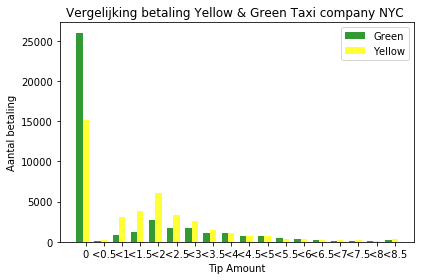

In [38]:
# Shows the graph of the tip amounts
import matplotlib.pyplot as plt
import numpy as np
n_groups = 18
payGreen = []
payGreen.extend((paymentsDetailGreen[0],paymentsDetailGreen[1],paymentsDetailGreen[2],paymentsDetailGreen[3],paymentsDetailGreen[4],paymentsDetailGreen[5],paymentsDetailGreen[6],paymentsDetailGreen[7],paymentsDetailGreen[8],paymentsDetailGreen[9],paymentsDetailGreen[10],paymentsDetailGreen[11],paymentsDetailGreen[12],paymentsDetailGreen[13],paymentsDetailGreen[14],paymentsDetailGreen[15],paymentsDetailGreen[16],paymentsDetailGreen[17]))
payYellow = []
payYellow.extend((paymentsDetailYellow[0],paymentsDetailYellow[1],paymentsDetailYellow[2],paymentsDetailYellow[3],paymentsDetailYellow[4],paymentsDetailYellow[5],paymentsDetailYellow[6],paymentsDetailYellow[7],paymentsDetailYellow[8],paymentsDetailYellow[9],paymentsDetailYellow[10],paymentsDetailYellow[11],paymentsDetailYellow[12],paymentsDetailYellow[13],paymentsDetailYellow[14],paymentsDetailYellow[15],paymentsDetailYellow[16],paymentsDetailYellow[17]))

print(payGreen)
print(payYellow)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, payGreen, bar_width,
                 alpha=opacity,
                 color='green',
                 label='Green')
 
rects2 = plt.bar(index + bar_width, payYellow, bar_width,
                 alpha=opacity,
                 color='yellow',
                 label='Yellow')
#,'No Charge','Dispute','Unknown','Voided trip'
plt.ylabel('Aantal betaling')
plt.title('Vergelijking betaling Yellow & Green Taxi company NYC ')
plt.xlabel('Tip Amount')

x_axis=['0','<0.5','<1','<1.5',"<2","<2.5","<3","<3.5","<4","<4.5","<5","<5.5","<6","<6.5","<7","<7.5","<8","<8.5","more"]
plt.xticks(index+bar_width,x_axis)

plt.legend()
 
plt.tight_layout()
plt.show()

In [39]:
#creates arrays to show different ways of payments(Jordan)
payments=results_dfGreen.payment_type
paymentsDetailGreen=[]
cash=[]
credit=[]
noCharge=[]
dispute=[]
unknown=[]
voidedTrip=[]
for x in payments:
    
    if x=='1':
        credit.append(x) 
    elif x=='2':
        cash.append(x)
    elif x=='3':
        noCharge.append(x)
    elif x=='4':
        dispute.append(x)
    elif x=='5':
        unknown.append(x)        
    else:
        voidedTrip.append(x)
paymentsDetailGreen.extend((len(cash),len(credit),len(noCharge),len(dispute),len(unknown),len(voidedTrip)))        
#print('Credit card payments: %s' %(len(credit)))
#print('Cash card payments: %s'%(len(cash)))
#print('No Charge: %s'%(len(noCharge)))
#print('Dispute payments: %s'%(len(dispute)))
#print('Unknown payments: %s'%(len(unknown)))
#print('Voided Trips: %s'%(len(voidedTrip)))
paymentsY=results_dfYellow.payment_type
paymentsDetailYellow=[]
cashY=[]
creditY=[]
noChargeY=[]
disputeY=[]
unknownY=[]
voidedTripY=[]
for y in paymentsY:
    
    if y=='1':
        creditY.append(y) 
    elif y=='2':
        cashY.append(y)
    elif y=='3':
        noChargeY.append(y)
    elif y=='4':
        disputeY.append(y)
    elif y=='5':
        unknownY.append(y)        
    else:
        voidedTripY.append(y)

paymentsDetailYellow.extend((len(cashY),len(creditY),len(noChargeY),len(disputeY),len(unknownY),len(voidedTripY)))
print(paymentsDetailYellow)
print(paymentsDetailGreen)

[13767, 25996, 190, 47, 0, 0]
[23185, 16446, 189, 176, 4, 0]


[23185, 16446]


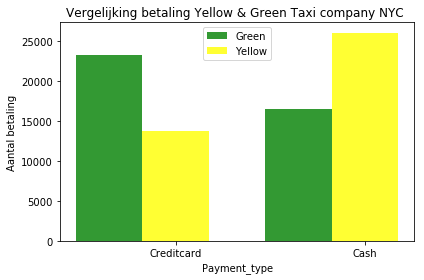

In [40]:
#Show graph of different payment options
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 2
payGreen = []
payGreen.extend((paymentsDetailGreen[0],paymentsDetailGreen[1]))
payYellow = []
payYellow.extend((paymentsDetailYellow[0],paymentsDetailYellow[1]))
print(payGreen)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, payGreen, bar_width,
                 alpha=opacity,
                 color='green',
                 label='Green')
 
rects2 = plt.bar(index + bar_width, payYellow, bar_width,
                 alpha=opacity,
                 color='yellow',
                 label='Yellow')
#,'No Charge','Dispute','Unknown','Voided trip'
plt.ylabel('Aantal betaling')
plt.title('Vergelijking betaling Yellow & Green Taxi company NYC ')
plt.xlabel('Payment_type')
x_axis=['Creditcard','Cash']
plt.xticks(index+bar_width,x_axis)
plt.legend()
 
plt.tight_layout()
plt.show()

[189, 176, 4, 0]
[190, 47, 0, 0]


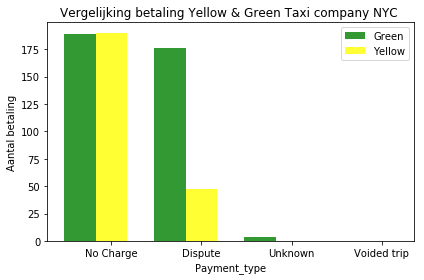

In [41]:
# data to plot
n_groups = 4
payGreen = []
payGreen.extend((paymentsDetailGreen[2],paymentsDetailGreen[3],paymentsDetailGreen[4],paymentsDetailGreen[5]))
payYellow = []
payYellow.extend((paymentsDetailYellow[2],paymentsDetailYellow[3],paymentsDetailYellow[4],paymentsDetailYellow[5]))

print(payGreen)
print(payYellow)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, payGreen, bar_width,
                 alpha=opacity,
                 color='green',
                 label='Green')
 
rects2 = plt.bar(index + bar_width, payYellow, bar_width,
                 alpha=opacity,
                 color='yellow',
                 label='Yellow')
#,'No Charge','Dispute','Unknown','Voided trip'
plt.ylabel('Aantal betaling')
plt.title('Vergelijking betaling Yellow & Green Taxi company NYC ')
plt.xlabel('Payment_type')
x_axis=['No Charge','Dispute','Unknown','Voided trip']
plt.xticks(index+bar_width,x_axis)
plt.legend()
 
plt.tight_layout()
plt.show()

In [42]:
#HERE STARTS THE MONGODB PART!
#Code to put the data of the API into a JSON File so it can be uploaded to MongoDB
import json

def writeToJSONFile(path, fileName, data):
    filePathNameWExt = './' + path + '/' + fileName + '.json'
    with open(filePathNameWExt, 'w') as fp:
        json.dump(data, fp)


# Example
data = {}
data['key'] = 'value'

writeToJSONFile('./','taxisMiliionsY',resultsYellow)
writeToJSONFile('./','taxisMiliions',resultsGreen)


In [43]:
#MONGOPY imports
import pymongo
from pymongo import MongoClient

In [44]:
#Create the MONGOPY client
client = MongoClient("localhost", 27017)
db = client.Taxi

In [45]:
#Show collections in TAXI DB
db.collection_names()

['taxiData']

In [46]:
#Get the data from the collection can also be filtered here
cursor=db.taxiData.find()

In [47]:
#Add the data to a array for the heatmap
from timeit import default_timer
cursor=db.taxiData.find()
data=[]
start = default_timer()
for x in range(0,1000):
    data.append(cursor[x])
    
duration = default_timer() - start
print(duration/60)

0.01026745470034219


In [48]:
#Add the data to the Heatmap
import os
import folium
from folium import plugins
from folium.plugins import HeatMap
m = folium.Map([40.730610, -73.935242], tiles='stamentoner', zoom_start=11)
array = []
for row in data:
    
    val1 =float(row['pickup_latitude'])
    val2 =float(row['pickup_longitude'])
    val3 =1
    
    array.append([val1, val2, val3])
    #print (array)
    #folium.Marker([val1, val2], popup=str(Aantal)).add_to(m)
    #print(key, ':', l[key][0], l[key][1], l[key][2])
    
HeatMap(array).add_to(m)
# I am using the magnitude as the weight for the heatmap
#print(array
m